In [5]:
# !pip install tensorflow

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Importing the dataset csv file and turning it into a table

In [6]:
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")
df = pd.read_csv(path + "/emails.csv")
display(df.head())

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into 70% training and 30% testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Prediction', 'Email No.'], axis=1),
    df['Prediction'],
    test_size=0.3,
    random_state=42
)

Define GridSearchCV

In [14]:
from scikeras.wrappers import KerasClassifier

def create_model(hidden_units=10, learning_rate=0.01, hidden_layers=1):

    model = tf.keras.Sequential()

    #layers of the neural network
    model.add(tf.keras.layers.Dense(hidden_units, activation='sigmoid', input_shape=(X_train.shape[1],))) #input layer
    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_units, activation='sigmoid')) #hidden layers
    model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer


    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, batch_size=len(X_train))
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

model = KerasClassifier(
    model=create_model,
    verbose=0
)

hyperparameters = {
    'epochs': [50, 100, 500, 1000],
    'hidden_units': [10, 20, 30, 40, 50],
    'hidden_layers': [1, 2, 3],
    'learning_rate': [0.01, 0.001, 0.0001]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


ValueError: Invalid parameter hidden_layers for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(hidden_layers=1)`
Check the list of available parameters with `estimator.get_params().keys()`

Train different models with different numbers of epochs

In [ ]:
epochs_list = [10, 50, 100, 150, 200, 250, 500, 750, 1000]

accuracy_list = []
error_list = []
precision_list = []
recall_list = []
specificity_list = []
f1_list = []
auc_list = []

for n in epochs_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)),
  ])

  model.compile(
      optimizer='sgd',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(X_train, y_train, batch_size=len(X_train), epochs=n)

  # loss, accuracy = model.evaluate(X_test, y_test)
  # print(f"Test Loss: {loss:.4f}")
  # print(f"Test Accuracy: {accuracy:.4f}")

  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob > 0.5).astype(int)

  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()

  accuracy_list.append(accuracy_score(y_test, y_pred))
  error_list.append(1 - accuracy_score(y_test, y_pred))
  precision_list.append(precision_score(y_test, y_pred))
  recall_list.append(recall_score(y_test, y_pred))
  specificity_list.append(tn / (tn + fp))
  f1_list.append(f1_score(y_test, y_pred))
  auc_list.append(roc_auc_score(y_test, y_pred_prob))

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5834 - loss: 0.6818
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6392 - loss: 0.6446
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6547 - loss: 0.6311
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6660 - loss: 0.6284
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6729 - loss: 0.6263
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6884 - loss: 0.6244
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6950 - loss: 0.6227
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6981 - loss: 0.6211
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7066 - loss: 0.6197
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7110 - loss: 0.6184
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.6928 - loss: 0.6526
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7130 - loss: 0.6184
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7130 - loss: 0.6106
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7130 - loss: 0.6073
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7130 - loss: 0.6053
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7130 - loss: 0.6037
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7130 - loss: 0.6022
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7130 - loss: 0.6007
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7130 - loss: 0.5989
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7130 - loss: 0.5969
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7130 - loss: 0.5947
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7127 - loss: 0.59

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6594 - loss: 0.6469
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7155 - loss: 0.5943
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7135 - loss: 0.5882
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7146 - loss: 0.5856
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7144 - loss: 0.5813
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7144 - loss: 0.5786
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7146 - loss: 0.5761
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7146 - loss: 0.5736
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7149 - loss: 0.5709
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7152 - loss: 0.5685
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7182 - loss: 0.5681
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7166 - loss: 0.5635


c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step - accuracy: 0.5064 - loss: 0.6993
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.6160 - loss: 0.6516
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6273 - loss: 0.6442
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6337 - loss: 0.6398
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6409 - loss: 0.6365
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6436 - loss: 0.6338
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.6533 - loss: 0.6316
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6599 - loss: 0.6297
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6674 - loss: 0.6280
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6743 - loss: 0.6265
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6848 - loss: 0.6252
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy:

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step - accuracy: 0.7122 - loss: 0.6307
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7133 - loss: 0.6191
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7133 - loss: 0.6142
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.7130 - loss: 0.6108
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7130 - loss: 0.6079
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.7130 - loss: 0.6053
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7130 - loss: 0.6030
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.7130 - loss: 0.6007
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7130 - loss: 0.5985
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7130 - loss: 0.5963
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.7130 - loss: 0.5941
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy:

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.3519 - loss: 0.7893
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5188 - loss: 0.7174
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5434 - loss: 0.7033
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5727 - loss: 0.6872
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5906 - loss: 0.6713
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6011 - loss: 0.6646
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6113 - loss: 0.6603
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6174 - loss: 0.6568
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6243 - loss: 0.6539
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6265 - loss: 0.6513
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6304 - loss: 0.6489
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6320 - loss: 0.6468

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.2887 - loss: 0.9932
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4834 - loss: 0.7402
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5227 - loss: 0.7185
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5431 - loss: 0.7092
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5555 - loss: 0.7025
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5655 - loss: 0.6971
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5743 - loss: 0.6926
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5790 - loss: 0.6888
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5848 - loss: 0.6853
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5923 - loss: 0.6823
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5989 - loss: 0.6795
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6050 - loss: 0.6

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.2914 - loss: 0.8283
Epoch 2/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5445 - loss: 0.7048
Epoch 3/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5727 - loss: 0.6838
Epoch 4/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5903 - loss: 0.6758
Epoch 5/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6014 - loss: 0.6697
Epoch 6/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6077 - loss: 0.6647
Epoch 7/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6110 - loss: 0.6607
Epoch 8/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6160 - loss: 0.6574
Epoch 9/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6210 - loss: 0.6546
Epoch 10/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6287 - loss: 0.6520
Epoch 11/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6298 - loss: 0.6498
Epoch 12/750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6315 - loss: 0

c:\Users\thoma\anaconda3\envs\ml-projects\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step - accuracy: 0.3036 - loss: 0.7525
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6751 - loss: 0.6541
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6964 - loss: 0.6446
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7066 - loss: 0.6368
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7108 - loss: 0.6313
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7119 - loss: 0.6270
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.7116 - loss: 0.6231
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7113 - loss: 0.6192
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7113 - loss: 0.6149
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7113 - loss: 0.6123
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7113 - loss: 0.6106
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Display results highlighting the best value of each metric

In [ ]:
results = pd.DataFrame({
    'Epochs': epochs_list,
    'Accuracy': accuracy_list,
    'Error': error_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'Specificity': specificity_list,
    'F1-score': f1_list,
    'AUC': auc_list
})

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# results = results.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-score', 'AUC'])
# results = results.apply(highlight_min, subset=['Error'])

display(results)

,Epochs,Accuracy,Error,Precision,Recall,Specificity,F1-score,AUC
0,10,0.711340,0.288660,0.577778,0.057143,0.982680,0.104000,0.489112
1,50,0.707474,0.292526,1.000000,0.002198,1.000000,0.004386,0.821621
2,100,0.778351,0.221649,0.937008,0.261538,0.992707,0.408935,0.916091
3,150,0.713918,0.286082,0.866667,0.028571,0.998177,0.055319,0.852962
4,200,0.844716,0.155284,0.818452,0.604396,0.944394,0.695322,0.931099
5,250,0.714562,0.285438,0.875000,0.030769,0.998177,0.059448,0.466223
6,500,0.711985,0.288015,0.833333,0.021978,0.998177,0.042827,0.458659
7,750,0.710696,0.289304,0.875000,0.015385,0.999088,0.030238,0.928211
8,1000,0.884021,0.115979,0.883008,0.696703,0.961714,0.778870,0.959013


Evolution of metrics with the number of epochs

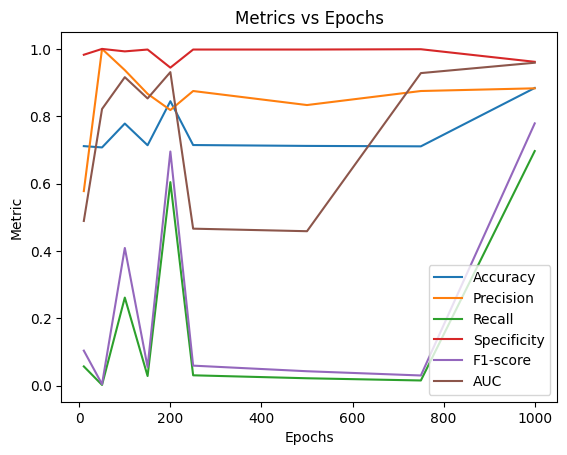

In [ ]:
plt.plot(epochs_list, accuracy_list, label='Accuracy')
plt.plot(epochs_list, precision_list, label='Precision')
plt.plot(epochs_list, recall_list, label='Recall')
plt.plot(epochs_list, specificity_list, label='Specificity')
plt.plot(epochs_list, f1_list, label='F1-score')
plt.plot(epochs_list, auc_list, label='AUC')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.title('Metrics vs Epochs')
plt.legend()
plt.show()